# Задание

1. Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
2. Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
3. Разделите данные на выборку для обучения и тестирования
4. Постройте модель LDA
5. Визуализируйте предсказания для тестовой выборки и центры классов
6. Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
7. Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sklearn.datasets as ds

In [3]:
iris = ds.load_iris()

In [4]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)[['sepal length (cm)', 'sepal width (cm)']]
target = iris.target
df

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.3)

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [7]:
y_pred = lda.predict(X_test)

In [8]:
view = pd.DataFrame([y_test, y_pred], index=['test', 'pred']).T

In [9]:
view[view['test']!=view['pred']]

,test,pred
3,1,2
9,2,1
13,1,2
23,2,1
24,2,1
26,2,1
32,1,2
35,2,1
44,2,1


In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8

In [11]:
means = pd.DataFrame(lda.means_, columns=['x', 'y'])
means

,x,y
0,5.061765,3.438235
1,5.971053,2.797368
2,6.545455,2.984848


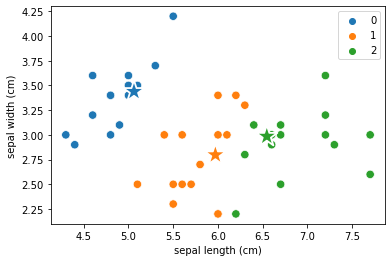

In [12]:
sns.scatterplot(x=X_test['sepal length (cm)'], y=X_test['sepal width (cm)'], hue=y_pred, s=70, palette='tab10')
sns.scatterplot(data=means, x='x', y='y', hue=np.unique(y_pred), palette='tab10', marker='*', s=500, legend=False)
plt.show()

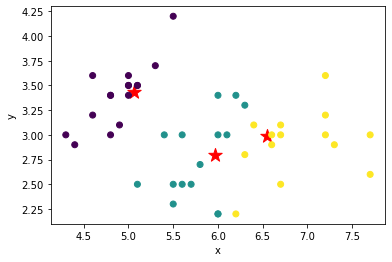

In [13]:
means.plot(kind='scatter', x='x', y='y', marker='*', s=200, color='red')
plt.scatter(x=X_test['sepal length (cm)'], y=X_test['sepal width (cm)'], c=y_pred)


In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [15]:
from sklearn.cluster import KMeans

In [16]:
inertia_i = []

span = range(2,10)

for i in span:
    km = KMeans(n_clusters=i)
    km.fit_predict(scaled_data)
    inertia_i.append(km.inertia_)

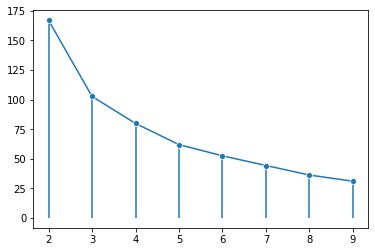

In [17]:
sns.lineplot(x=span, y=inertia_i, marker='o')
plt.vlines(x=span, ymin=0, ymax=inertia_i)
plt.xticks(span)
plt.show()

Из графика "локтя" мы не можем точно сказать оптимальное количество кластеров.

Воспользуемся дендрограммой для дальнейшого поиска оптимального числа кластеров.

In [18]:
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy

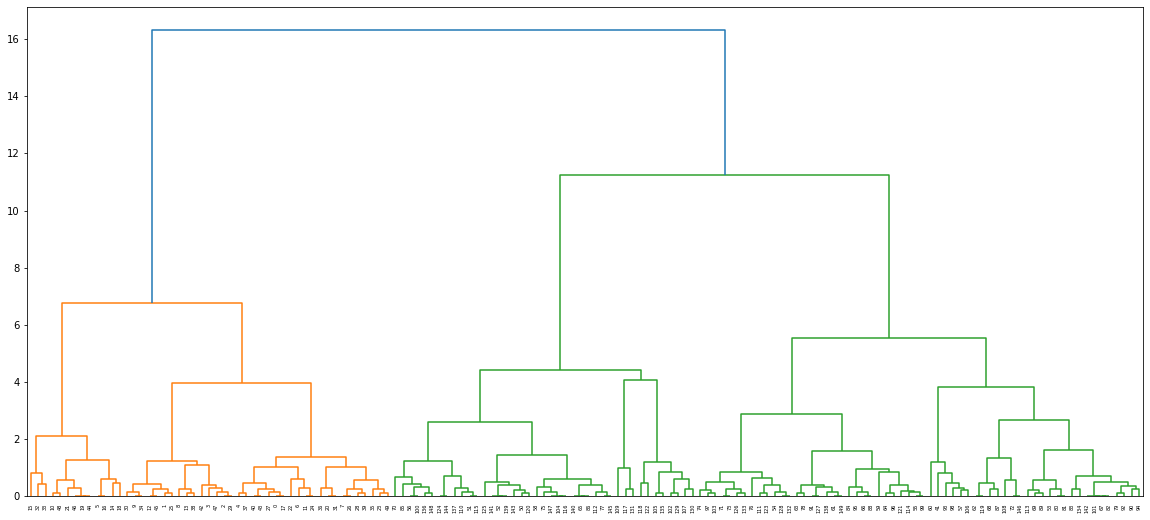

In [19]:
# строим дендрограмму
distance_mat = pdist(scaled_data) # pdist посчитает нам матрицу попарных расстояний между точками
# Z = hierarchy.linkage(distance_mat) # linkage — реализация агломеративного алгоритма
Z = hierarchy.linkage(distance_mat, 'ward')
plt.figure(figsize=(20, 9))
dn = hierarchy.dendrogram(Z)

Как мы видим из дендрограммы оптимальным будет число кластеров 2 и 4.

При числе кластеров равным 4

In [20]:
kmeans = KMeans(n_clusters=4)

In [21]:
Kpred = kmeans.fit_predict(scaled_data)

<AxesSubplot:>

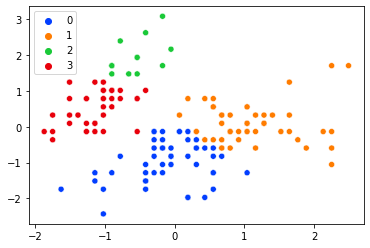

In [22]:
sns.scatterplot(x=scaled_data[:,0], y=scaled_data[:,1], hue=Kpred, palette='bright')

Число кластеров равно двум

In [23]:
kmeans = KMeans(n_clusters=2)

In [24]:
Kpred = kmeans.fit_predict(scaled_data)

<AxesSubplot:>

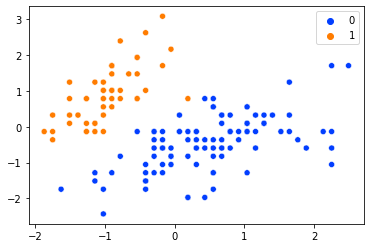

In [25]:
sns.scatterplot(x=scaled_data[:,0], y=scaled_data[:,1], hue=Kpred, palette='bright')